<a href="https://colab.research.google.com/github/gautamaggarwal2810/Automatic_Multi_Lingual_Document_Translation_Solution/blob/main/Project1_24_AFI_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
Training_DF=pd.read_csv('/content/train.csv')
Training_DF.drop(['ID'], axis=1,inplace=True)
Training_DF["chas"] = Training_DF["chas"].astype('category')
Training_DF.head(100)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46,17.8
96,1.62864,0.0,21.89,0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41,14.4
97,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
98,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403,14.7,172.91,27.80,13.8


In [4]:
Test_DF=pd.read_csv('/content/test.csv')
Test_DF.drop(['ID'], axis=1,inplace=True)
Test_DF["chas"] = Training_DF["chas"].astype('category')
Test_DF.head(100)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.04297,52.5,5.32,0,0.405,6.565,22.9,7.3172,6,293,16.6,371.72,9.51
96,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245,19.2,396.90,3.56
97,0.08199,0.0,13.92,1,0.437,6.009,42.3,5.5027,4,289,16.0,396.90,10.40
98,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,396.90,6.27


In [5]:
Training_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     333 non-null    float64 
 1   zn       333 non-null    float64 
 2   indus    333 non-null    float64 
 3   chas     333 non-null    category
 4   nox      333 non-null    float64 
 5   rm       333 non-null    float64 
 6   age      333 non-null    float64 
 7   dis      333 non-null    float64 
 8   rad      333 non-null    int64   
 9   tax      333 non-null    int64   
 10  ptratio  333 non-null    float64 
 11  black    333 non-null    float64 
 12  lstat    333 non-null    float64 
 13  medv     333 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 34.4 KB


In [47]:
Training_DF.isnull().sum()


,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [45]:
Training_DF.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,2.363319,11.193396,10.997925,0.552211,6.315390,66.981132,3.808309,9.069182,399.018868,18.371069,363.852170,11.938962,23.142138
std,4.289918,23.082718,6.990529,0.114748,0.629004,28.142427,1.971782,8.435032,166.506126,2.165702,80.088909,6.305109,8.894413
min,0.006320,0.000000,0.740000,0.385000,4.652000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,7.200000
25%,0.071848,0.000000,4.950000,0.450000,5.907250,43.475000,2.213800,4.000000,277.000000,17.000000,377.295000,6.922500,17.800000
50%,0.229015,0.000000,8.560000,0.532000,6.217500,74.650000,3.207450,5.000000,329.000000,18.700000,392.145000,10.520000,21.800000
75%,2.429845,12.500000,18.100000,0.624000,6.617500,92.975000,5.213925,8.000000,461.000000,20.200000,396.192500,15.827500,25.075000
max,24.801700,100.000000,27.740000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,29.680000,50.000000


<Axes: >

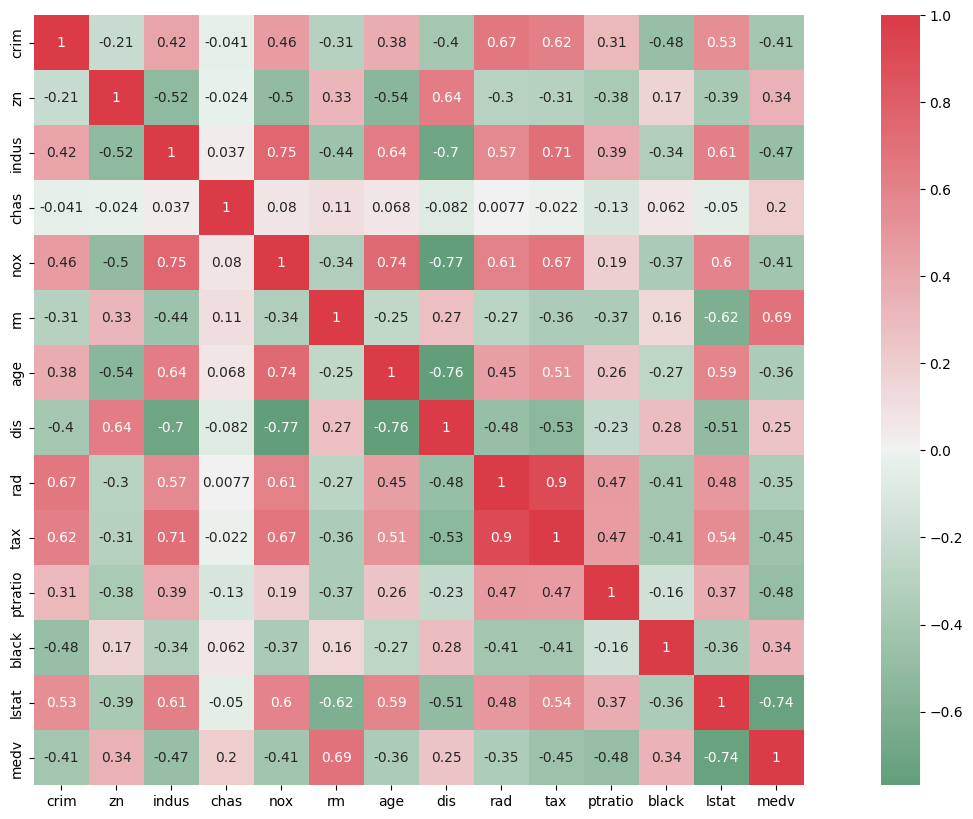

In [15]:
# Correlation Matric for Feature Selection
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(Training_DF.corr(),cmap=cmap,center=0,square=True,annot=True)

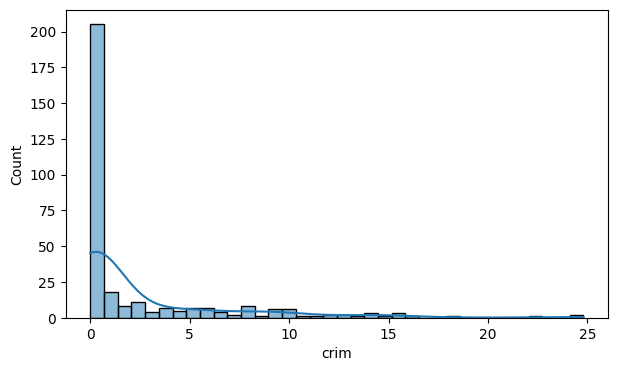

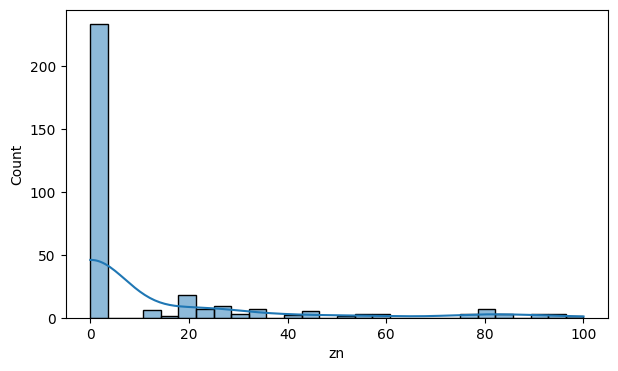

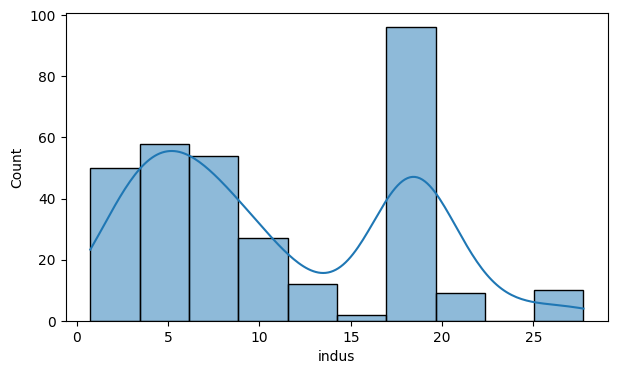

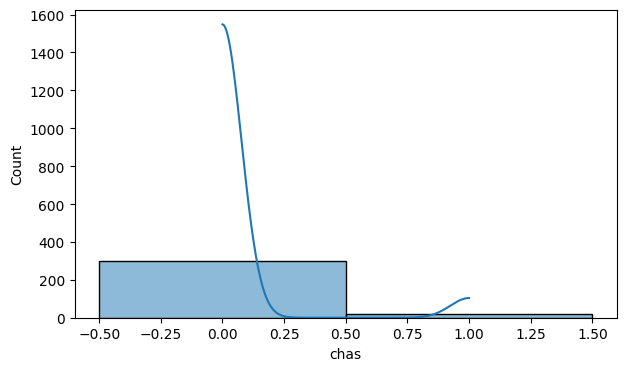

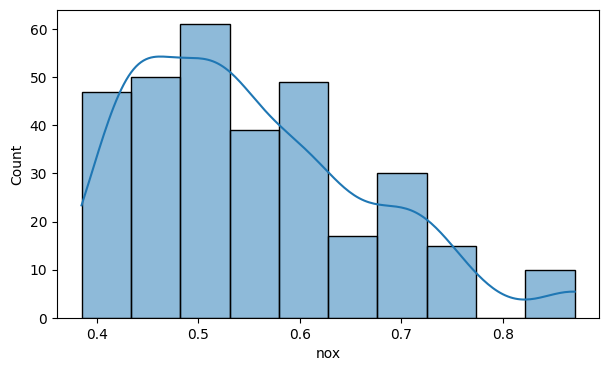

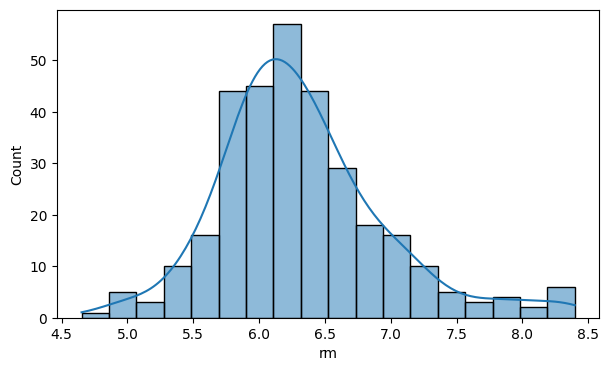

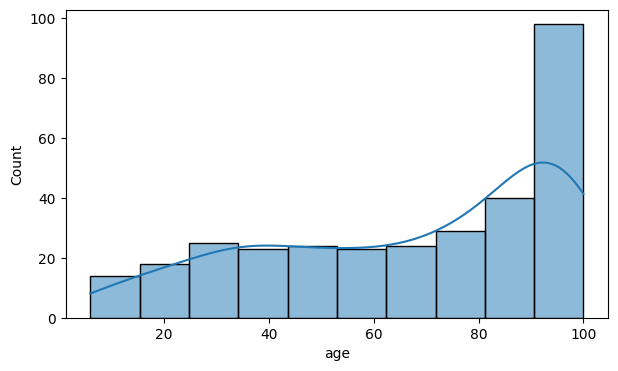

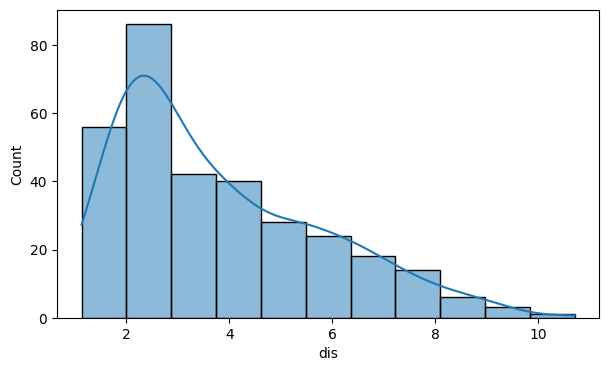

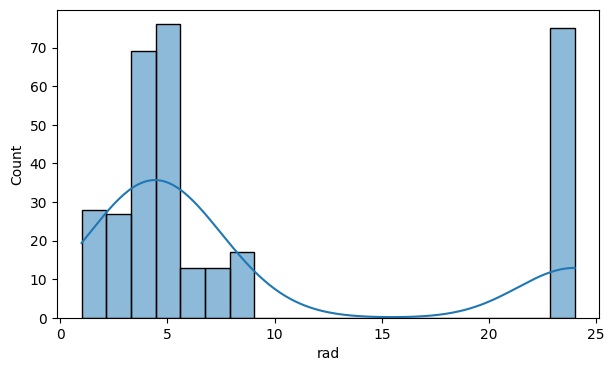

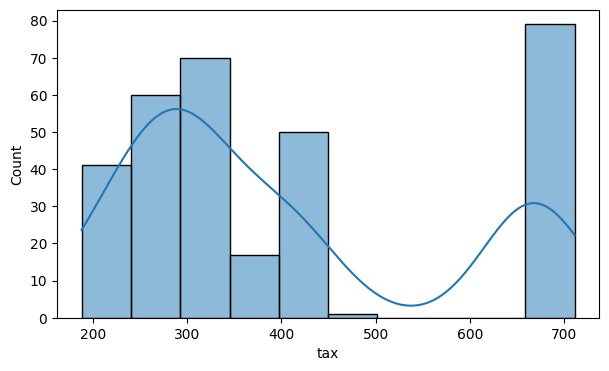

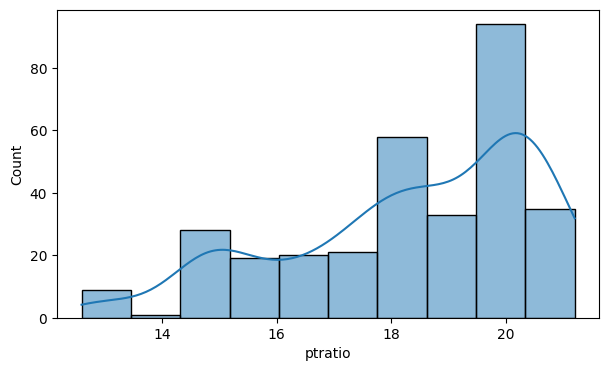

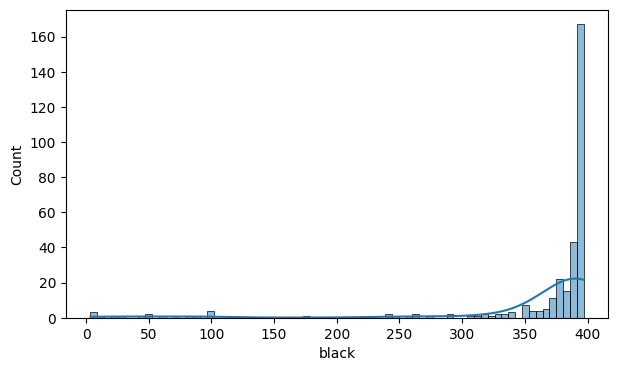

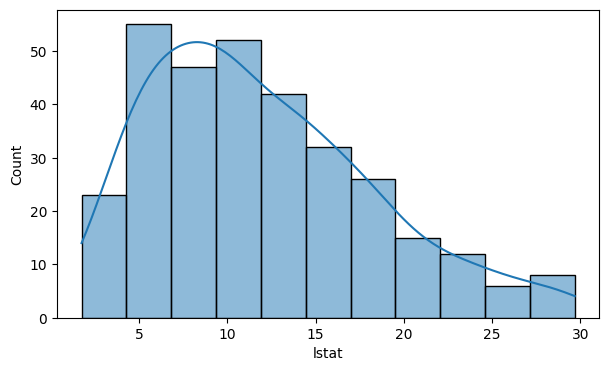

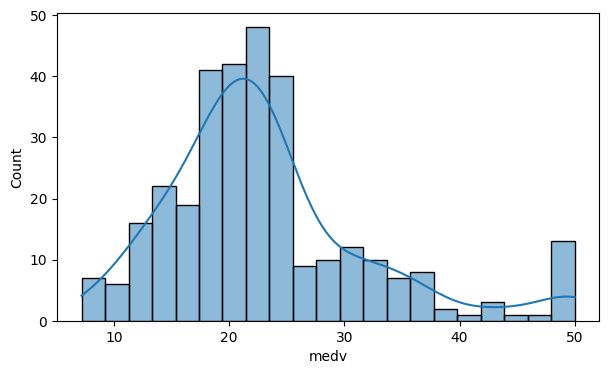

In [46]:
for i in Training_DF.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = Training_DF, x = i, kde = True)
    plt.show()

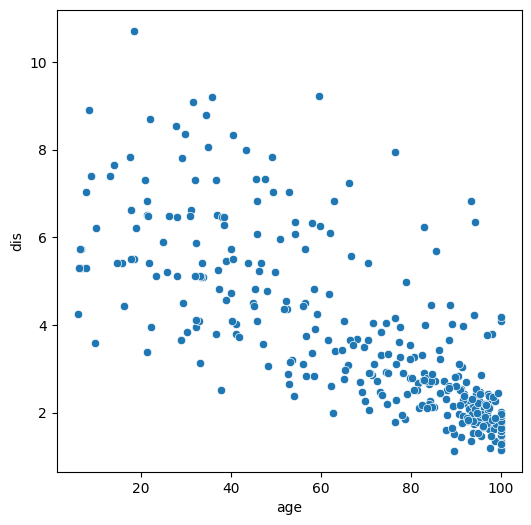

In [23]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'age', y = 'dis', data = Training_DF)
plt.show()

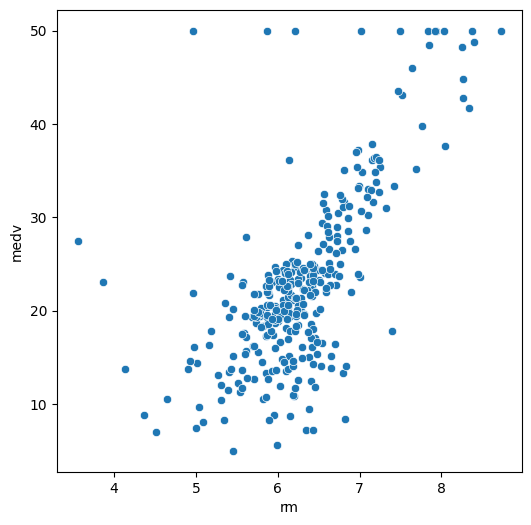

In [25]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'rm', y = 'medv', data = Training_DF)
plt.show()

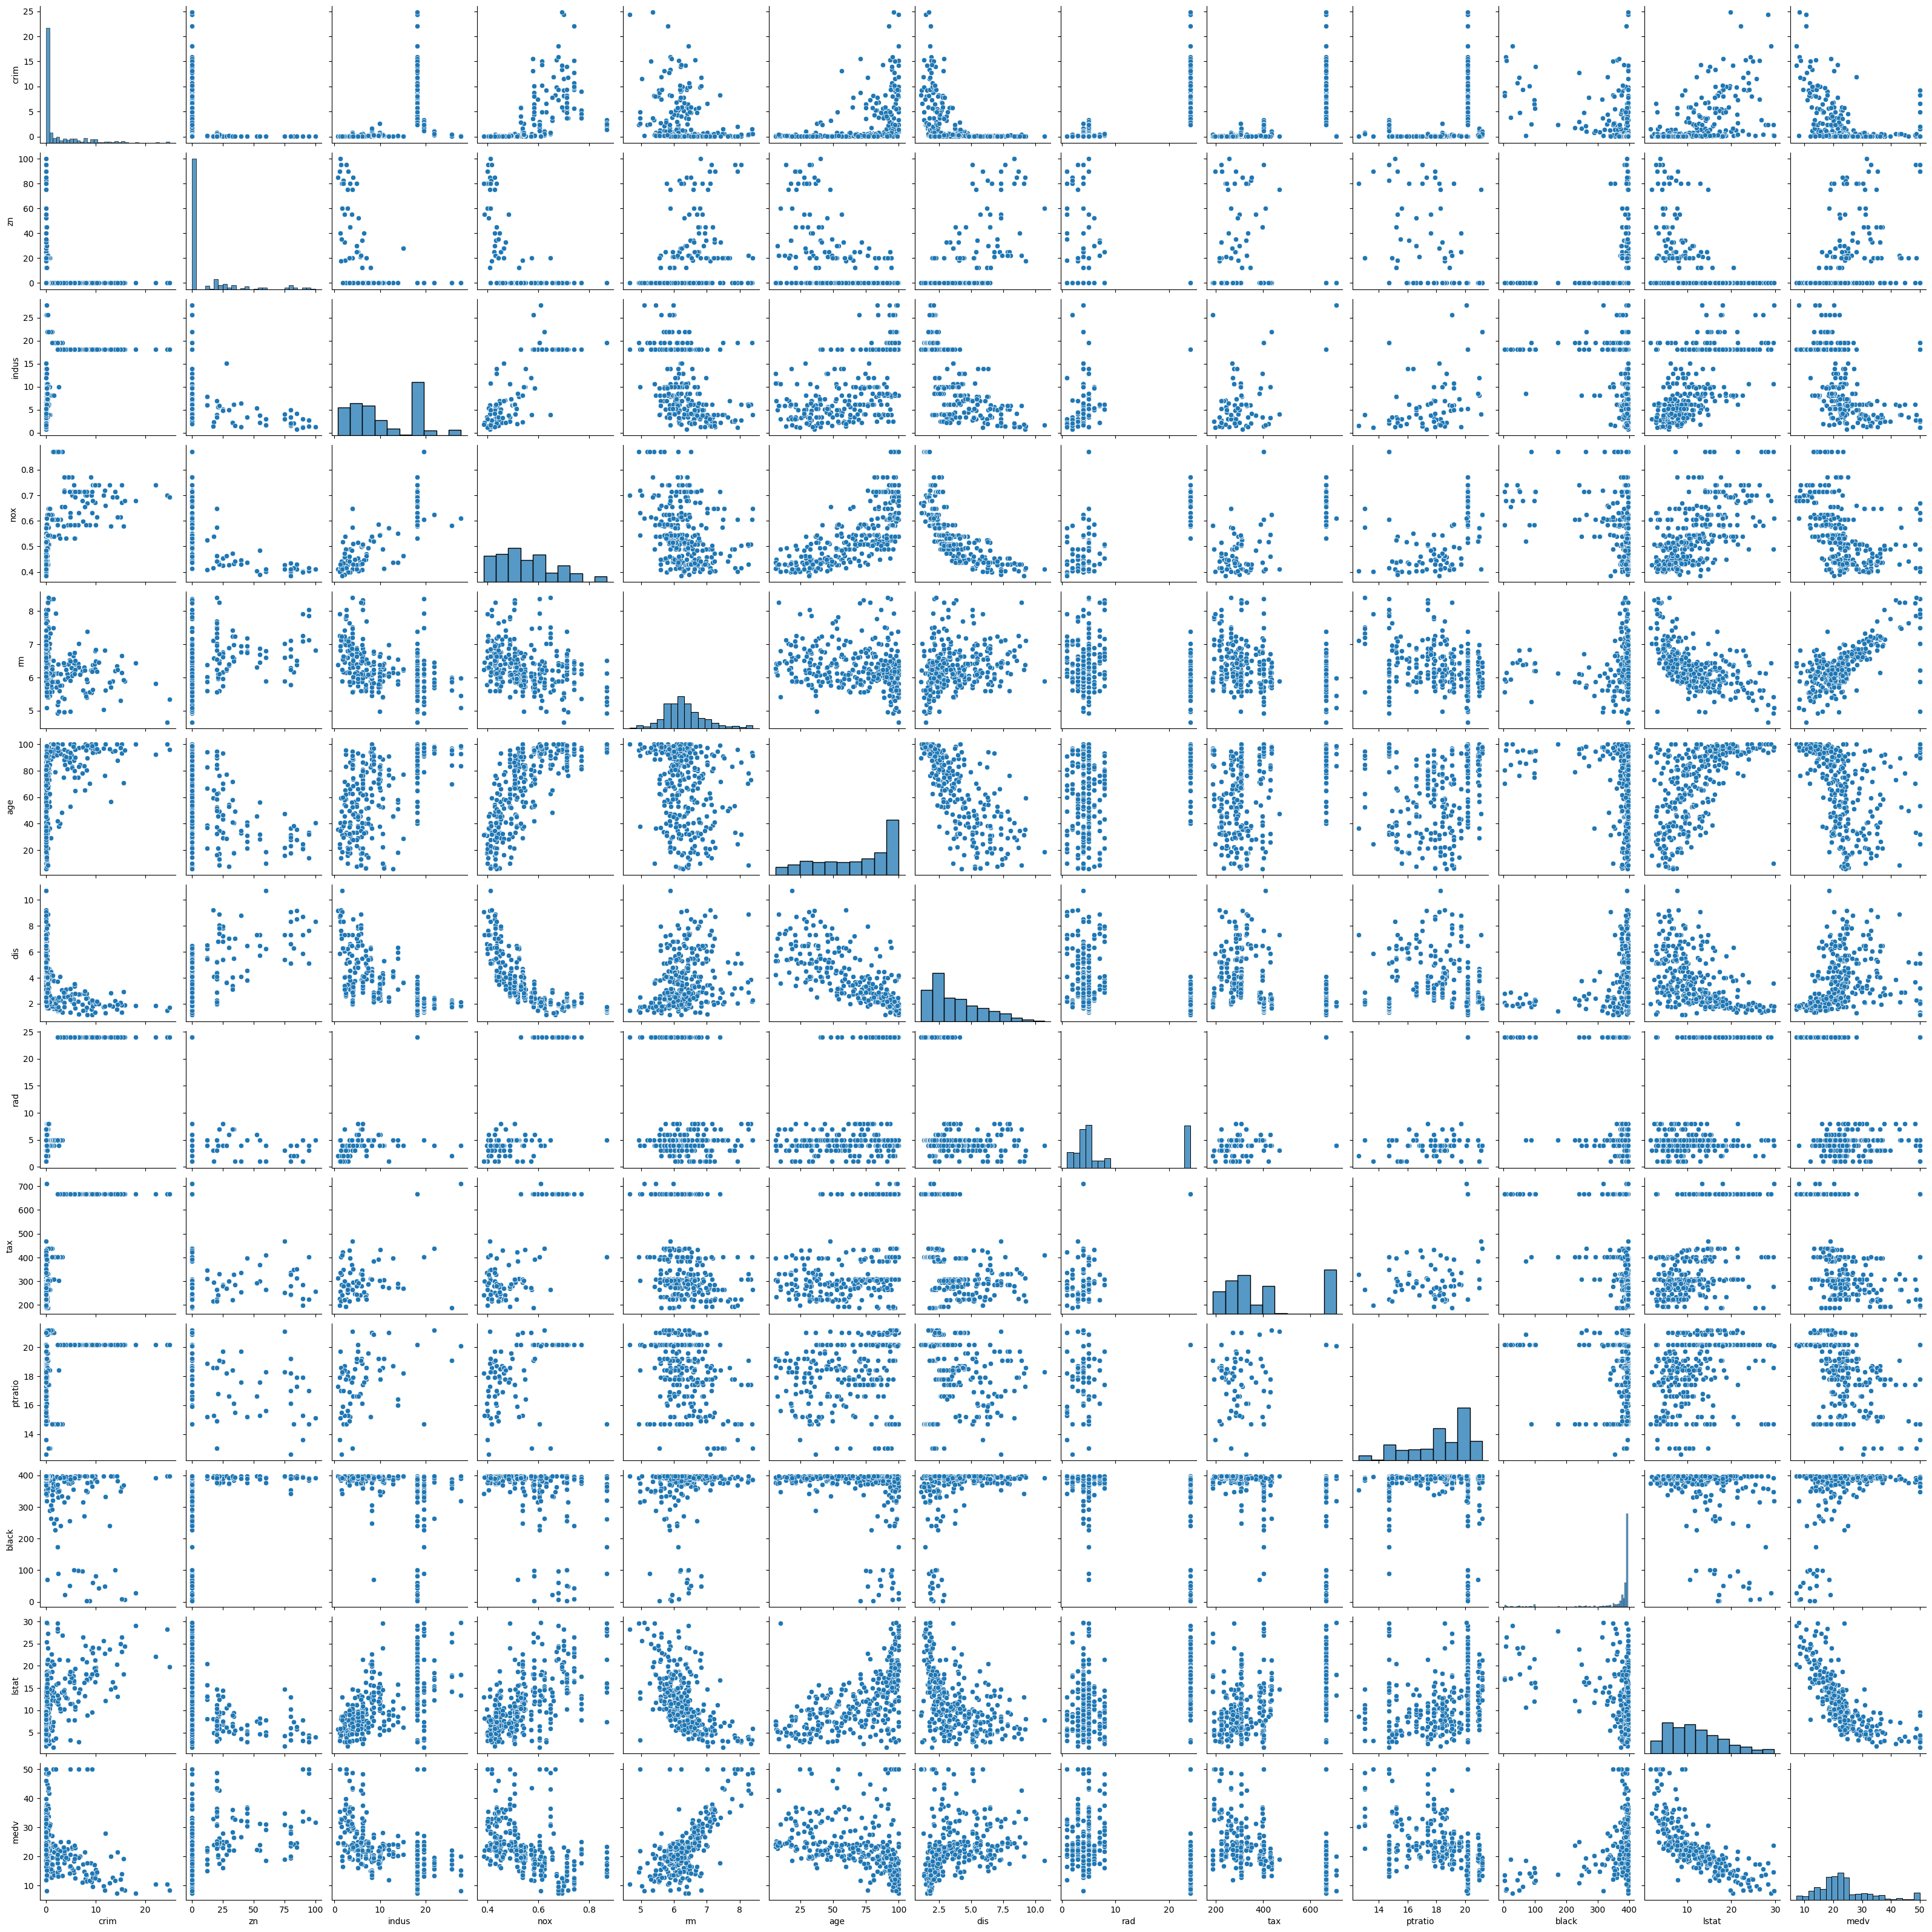

In [43]:
sns.pairplot(Training_DF)
plt.show()

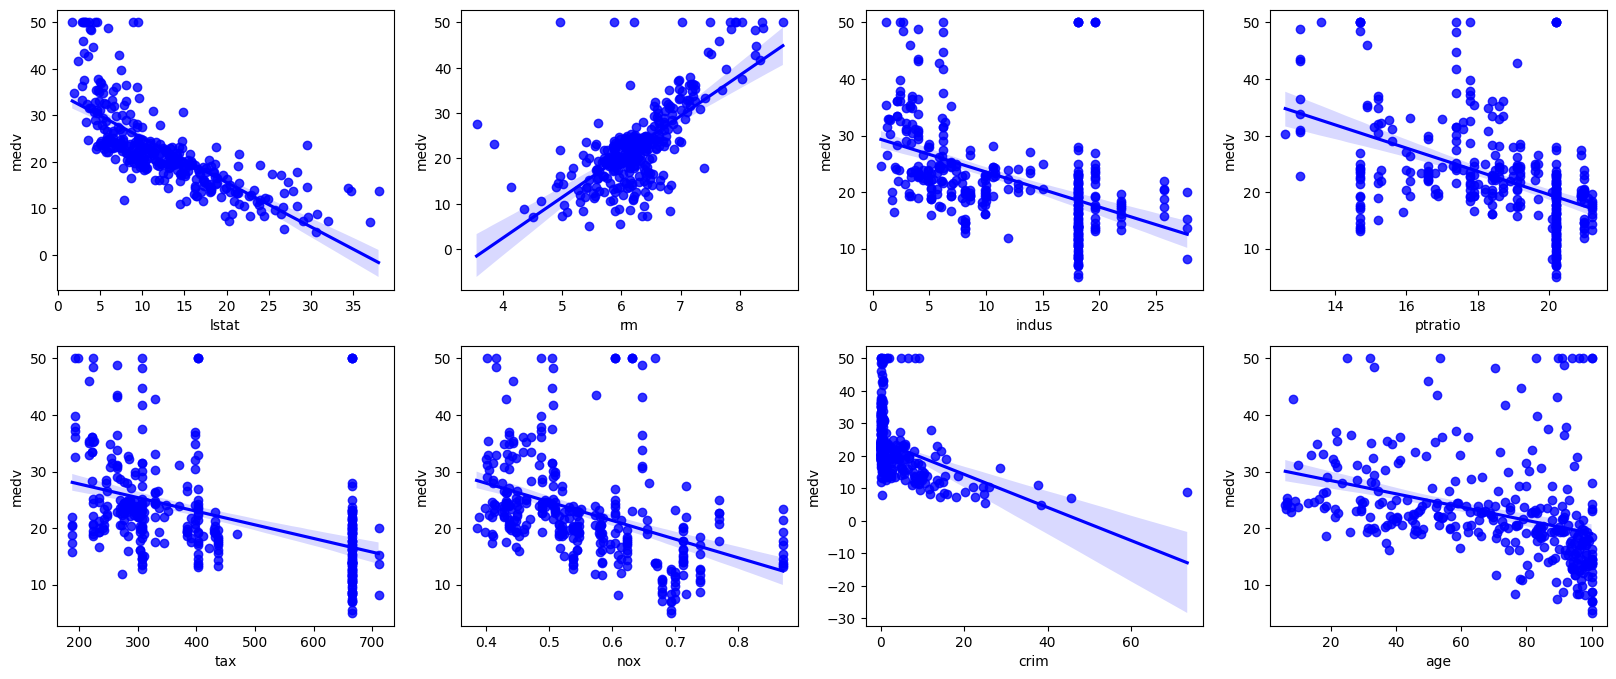

In [16]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['lstat','rm','indus','ptratio','tax','nox','crim','age']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=Training_DF[col],y=Training_DF['medv'],color = 'blue',ax=ax)

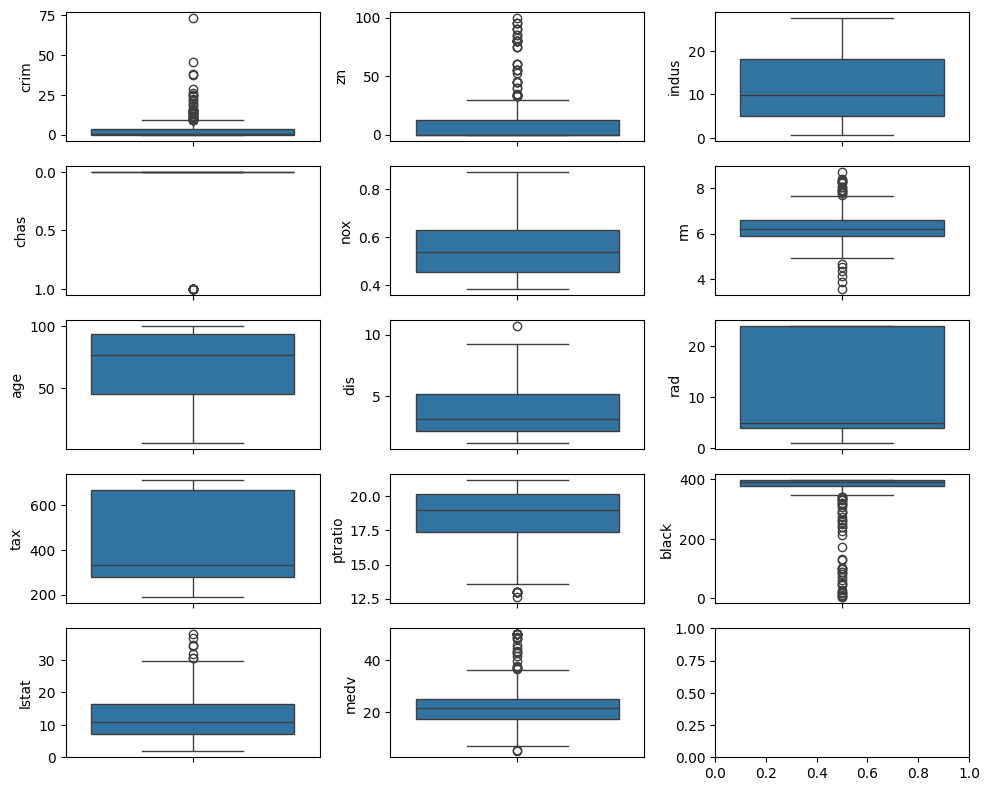

In [18]:
fig, axs = plt.subplots(nrows=5,ncols=3,figsize=(10,8))
index = 0
axs = axs.flatten()
for k,v in Training_DF.items():
    sns.boxplot(y=k,data=Training_DF,ax=axs[index])
    index+=1
plt.tight_layout()

In [26]:
X = Training_DF.iloc[:,1:13].values
Y = Training_DF.iloc[:,-1].values
LR = LinearRegression()
LR.fit(X,Y)
print("Intercept : ", LR.intercept_)
print("Slope : ", LR.coef_)
Y_pred = LR.predict(X)
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error : ", RMSE)

Intercept :  33.30689438118155
Slope :  [ 4.60060907e-02  5.93431653e-02  3.81315362e+00 -1.54137645e+01
  3.79619876e+00 -4.61661984e-03 -1.51921822e+00  3.04191832e-01
 -1.27775673e-02 -8.51445388e-01  1.25856829e-02 -6.14702822e-01]
Root Mean Square Error :  4.7388142322521


In [44]:
def iqr_func(data):
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    return iqr

#function for detect outliers in data, base on IQR criterion
def outlier_func(data):
    outlier = []
    q3, q1 = np.percentile(data, [75 ,25])
    iqr = q3 - q1
    for i in data :
        if (i > (q3 + 1.5 * iqr) or i < (q1 - 1.5 * iqr)):
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

In [28]:
Training_DF=Training_DF[~((Training_DF['crim']>=25))]
Training_DF=Training_DF[~((Training_DF['rm']>=8.5)|(Training_DF['rm']<4))]
Training_DF=Training_DF[~((Training_DF['lstat']>=30))]

In [30]:
X = Training_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values
Y = Training_DF[['medv']].values

In [32]:
LR = LinearRegression()
LR.fit(X,Y)
print("Intercept : ", LR.intercept_)
print("Slope : ", LR.coef_)

Intercept :  [12.16872968]
Slope :  [[-7.19484858e-01  5.34359785e+00  1.26504710e-01 -7.81817665e-01
  -2.89044912e-03 -2.60911011e+00  5.63687328e-02  1.86447916e-02]]


In [33]:
Y_pred = LR.predict(X)
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error : ", RMSE)

Root Mean Square Error :  4.916284302163122


In [42]:
X_test = Test_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values
Y_test_pred = LR.predict(X_test)
# print(Y_test_pred)
for  y in Y_test_pred:
    print(y)

[33.85856388]
[27.69481744]
[20.01705336]
[9.44659407]
[20.40553285]
[17.51003005]
[18.31295909]
[16.21387453]
[14.17458613]
[16.61750091]
[21.79014061]
[23.21717856]
[7.9538319]
[13.58671836]
[21.81756194]
[19.95633294]
[21.53185882]
[29.96108933]
[5.67990036]
[29.28961304]
[21.33678643]
[26.33954371]
[21.84123223]
[21.64610633]
[22.30848147]
[22.40932351]
[25.44815008]
[26.33351513]
[27.4054216]
[28.20410204]
[38.01506739]
[36.41377436]
[32.84646915]
[20.21357106]
[15.67085348]
[19.21559717]
[18.51572554]
[18.89126578]
[18.83472569]
[21.41049371]
[14.21401783]
[22.77875668]
[23.37949168]
[18.98376141]
[12.84234145]
[12.02103385]
[6.82168615]
[19.79588876]
[20.98645504]
[19.48178784]
[23.52206157]
[36.09274837]
[42.65323497]
[28.11095763]
[18.29858387]
[21.43657641]
[30.73112814]
[39.67201333]
[37.1464237]
[35.32763654]
[31.12814438]
[37.56528971]
[16.1679073]
[10.72241788]
[18.03945585]
[17.40235972]
[23.91239837]
[28.98228945]
[19.53299896]
[27.10067286]
[28.96664465]
[35.73135465]
